# Exploring Dandiset 000690: Allen Institute Openscope - Vision2Hippocampus project

**Important:** This notebook was AI-generated and has not been fully verified.
Please be cautious when interpreting the code or results.

## Overview of the Dandiset

This notebook provides an overview of Dandiset 000690, which contains data from the Allen Institute Openscope - Vision2Hippocampus project.

You can find the Dandiset here: [https://dandiarchive.org/dandiset/000690](https://dandiarchive.org/dandiset/000690)

## What this notebook will cover

- Loading the Dandiset using the DANDI API
- Listing the assets in the Dandiset
- Loading and visualizing eye tracking data
- Loading and visualizing running speed data

## Required Packages

- pynwb
- h5py
- remfile
- matplotlib
- numpy
- seaborn

**Note:** Please make sure that these packages are already installed in your environment.


In [1]:
from dandi.dandiapi import DandiAPIClient

# Connect to DANDI archive
client = DandiAPIClient()
dandiset = client.get_dandiset("000690")

# Print basic information about the Dandiset
metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata['url']}")

# List the assets in the Dandiset
assets = list(dandiset.get_assets())
print(f"\nFound {len(assets)} assets in the dataset")
print("\nFirst 5 assets:")
for asset in assets[:5]:
    print(f"- {asset.path}")

Dandiset name: Allen Institute Openscope - Vision2Hippocampus project
Dandiset URL: https://dandiarchive.org/dandiset/000690/0.250326.0015

Found 156 assets in the dataset

First 5 assets:
- sub-692077/sub-692077_ses-1300222049_probe-4_ecephys.nwb
- sub-692077/sub-692077_ses-1300222049_probe-3_ecephys.nwb
- sub-692077/sub-692077_ses-1300222049_probe-2_ecephys.nwb
- sub-692077/sub-692077_ses-1300222049_probe-0_ecephys.nwb
- sub-692077/sub-692077_ses-1300222049.nwb


## Loading an NWB file and showing some metadata

We will load the NWB file `sub-692072/sub-692072_ses-1298465622.nwb` and show some metadata.
The URL for this asset is: `https://api.dandiarchive.org/api/assets/fbcd4fe5-7107-41b2-b154-b67f783f23dc/download/`.


In [2]:
import pynwb
import h5py
import remfile

# Load
url = "https://api.dandiarchive.org/api/assets/fbcd4fe5-7107-41b2-b154-b67f783f23dc/download/"
remote_file = remfile.File(url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

print(nwb.session_description)
print(nwb.identifier)
print(nwb.session_start_time)

/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.6.0 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.3.0 because version 0.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


Data and metadata for an Ecephys session
1298465622
2023-09-21 00:00:00-07:00


## Loading and visualizing eye tracking data

We will load the eye tracking data and plot it over time.


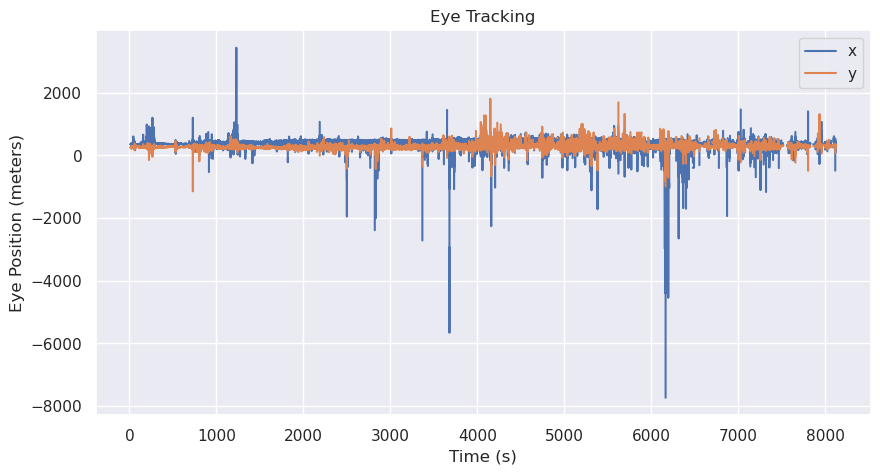

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
import numpy as np

eye_tracking_data = nwb.acquisition["EyeTracking"].spatial_series["eye_tracking"].data[:]
eye_tracking_timestamps = nwb.acquisition["EyeTracking"].spatial_series["eye_tracking"].timestamps[:]

plt.figure(figsize=(10, 5))
plt.plot(eye_tracking_timestamps, eye_tracking_data[:, 0], label="x")
plt.plot(eye_tracking_timestamps, eye_tracking_data[:, 1], label="y")
plt.xlabel("Time (s)")
plt.ylabel("Eye Position (meters)")
plt.title("Eye Tracking")
plt.legend()
plt.show()
plt.close()

## Loading and visualizing running speed data

We will load the running speed data and plot it over time.


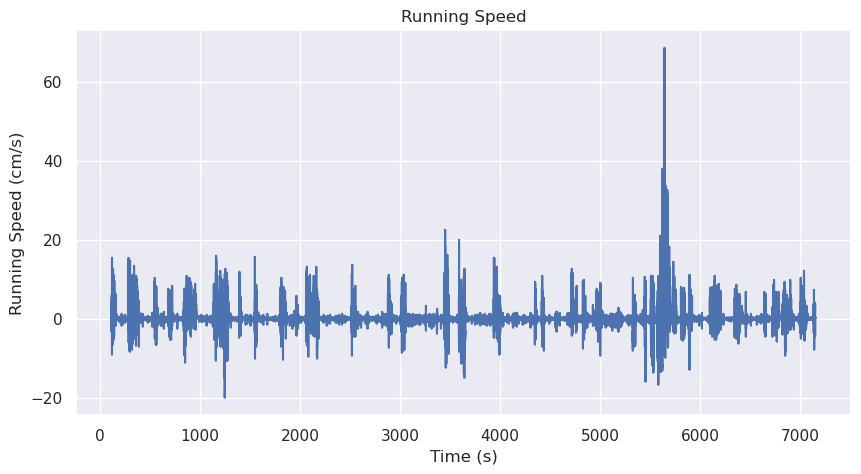

In [4]:
running_speed = nwb.processing["running"].data_interfaces["running_speed"].data[:]
running_speed_timestamps = nwb.processing["running"].data_interfaces["running_speed"].timestamps[:]

plt.figure(figsize=(10, 5))
plt.plot(running_speed_timestamps, running_speed)
plt.xlabel("Time (s)")
plt.ylabel("Running Speed (cm/s)")
plt.title("Running Speed")
plt.show()
plt.close()

## Summary and Future Directions

This notebook provides a basic overview of how to load and visualize data from Dandiset 000690.

Possible future directions for analysis include:

- Analyzing the relationship between eye tracking and running speed
- Investigating the neural activity in relation to the visual stimuli
- Exploring the data from other NWB files in the Dandiset